**Lab 5: Tổng hợp**

Cho tập dữ liệu wine Quality
1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên, thông tin về dữ liệu, thống kê mô tả

2. Phân tích khám phá dữ liệu
-- kiểm tra giá trị thiếu
-- Vẽ histogram cho tất cả các biến và nhận xét
-- Vẽ boxlot cho tất cả các biến và nhận xet
-- Vẽ Scatterplot cho "alcohol" và "quality"

3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó.

4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn
-- xáo trộn dữ liệu
-- Chia dữ liệu với 80% huấn luyện
-- Tách dữ liệu
-- Tách đặc trưng và nhãn

5. Chuẩn bị dữ Liệu
-- Khởi tạo bộ dữ liệu chuẩn hóa
-- Chuẩn hóa dữ liệu
-- Chuẩn hóa kiểm tra

6. Ứng dụng mô hình hồi quy tuyến tính
--- Khởi tạo
--- Huấn luyện
--- Dự đoán trên tập kiểm tra

7. Đánh giá mô hình
Tính MSE và R^2


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# 1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên, thông tin về dữ liệu, thống kê mô tả
import pandas as pd
import numpy as np

df = pd.read_csv("winequality-red.csv", delimiter=";", quotechar='"', engine="python", header=0)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# thông tin dữ liệu 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# thống kê mô tả
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Số lượng giá trị thiếu trong mỗi cột:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


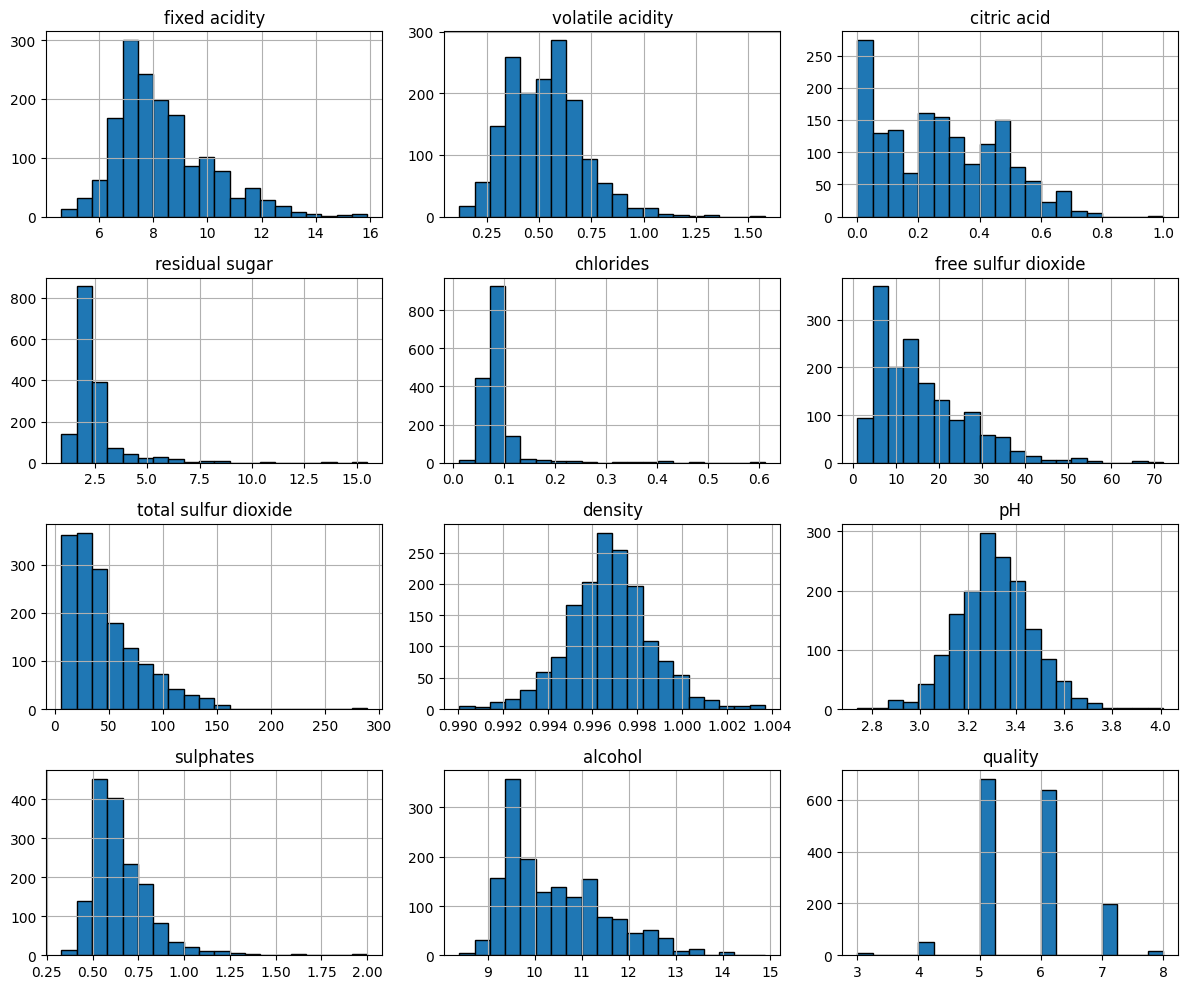

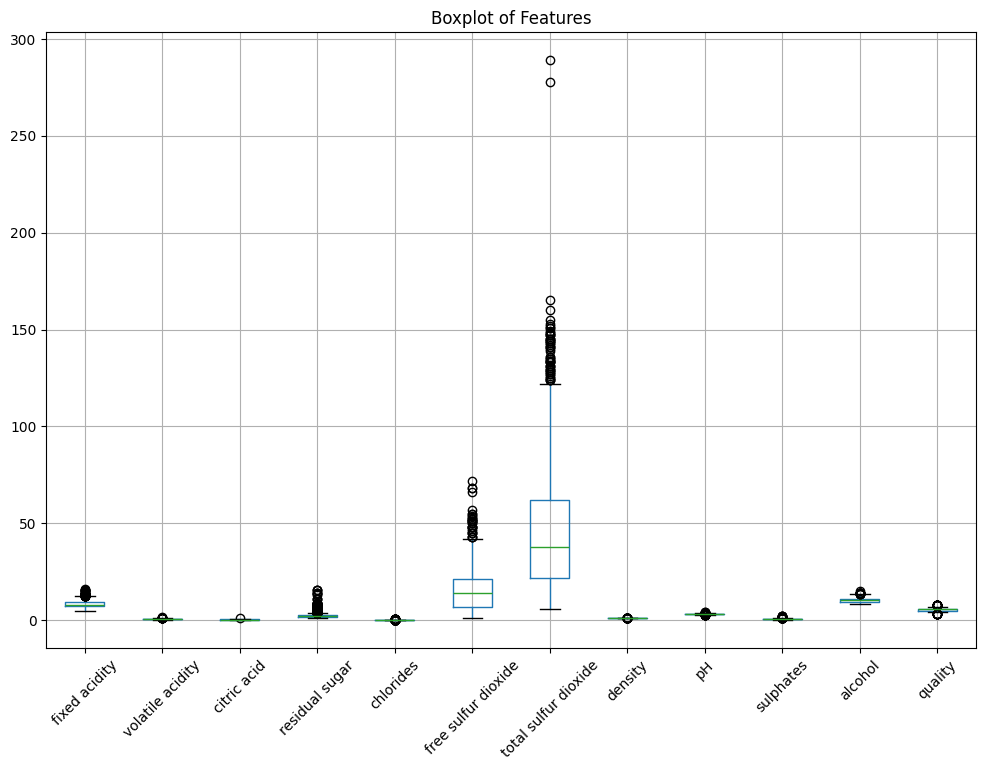

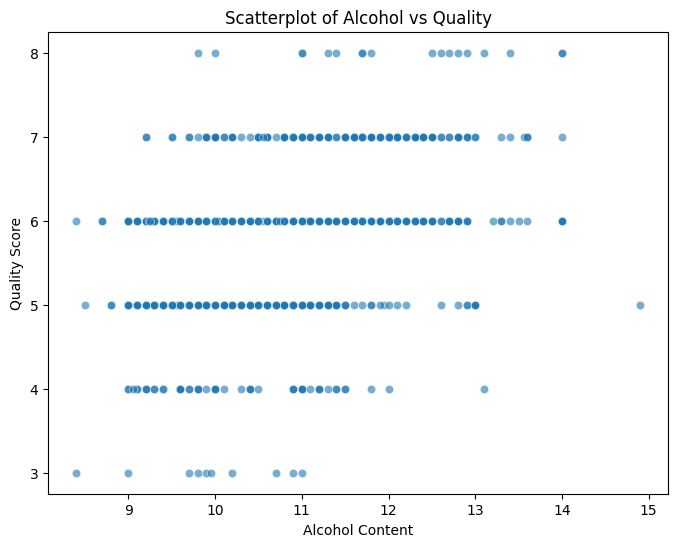

In [34]:
# 2. Phân tích khám phá dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1. Kiểm tra giá trị thiếu
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong mỗi cột:\n", missing_values)

# 2.2. Vẽ histogram cho tất cả các biến và nhận xét
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()
# Nhận xét:
# - Các biến "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH" có phân phối lệch phải.
# - Biến "alcohol" có phân phối lệch trái.
# - Biến "quality" có phân phối không đồng đều.

# 2.3. Vẽ boxplot cho tất cả các biến và nhận xét
plt.figure(figsize=(12, 8))
df.boxplot(rot=45)
plt.title("Boxplot of Features")
plt.show()
# Nhận xét:
# - Các biến "fixed acidity", "citric acid", "free sulfur dioxide", "total sulfur dioxide", "sulphates" có nhiều giá trị ngoại lệ.
# - Biến "residual sugar" có phân phối lệch phải.
# - Biến "alcohol" có phân phối lệch trái.
# - Biến "quality" có phân phối không đồng đều.


# 2.4. Vẽ Scatterplot cho "alcohol" và "quality"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["alcohol"], y=df["quality"], alpha=0.6)
plt.xlabel("Alcohol Content")
plt.ylabel("Quality Score")
plt.title("Scatterplot of Alcohol vs Quality")
plt.show()
# Nhận xét:
# - Có vẻ như chất lượng rượu tăng dần theo nồng độ cồn tăng.
# - Có một số rượu có nồng độ cồn cao nhưng chất lượng thấp.



In [ ]:


# 4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn
# -- xáo trộn dữ liệu
# -- Chia dữ liệu với 80% huấn luyện
# -- Tách dữ liệu
# -- Tách đặc trưng và nhãn

# 5. Chuẩn bị dữ Liệu
# -- Khởi tạo bộ dữ liệu chuẩn hóa
# -- Chuẩn hóa dữ liệu
# -- Chuẩn hóa kiểm tra

# 6. Ứng dụng mô hình hồi quy tuyến tính
# --- Khởi tạo
# --- Huấn luyện
# --- Dự đoán trên tập kiểm tra

# 7. Đánh giá mô hình
# Tính MSE và R^2

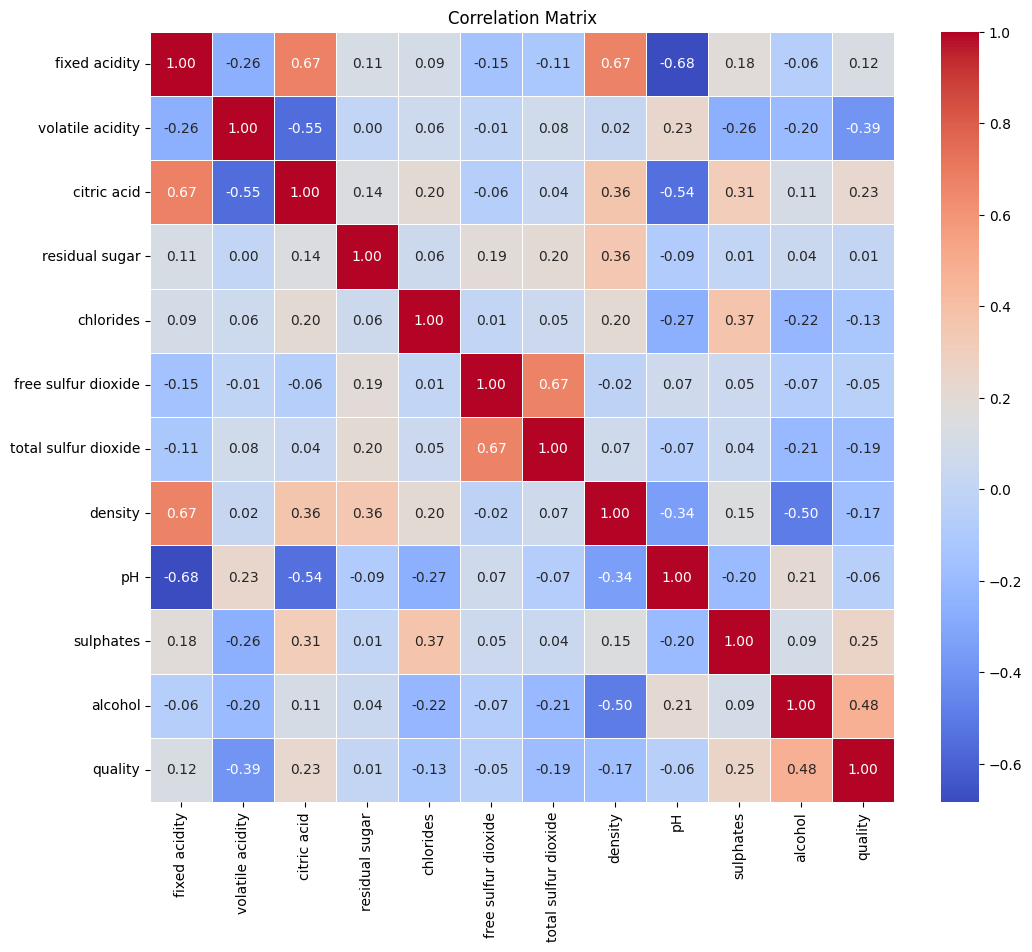

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Tính toán ma trận tương quan
corr = df.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [9]:
# 4. chia dữ liệu thủ công không dùng thư viện có sẵn
print(df.shape)
# 4.1 Xáo trộn dữ liệu
# Xáo trộn dữ liệu
shuffled_indices = np.random.permutation(df.index)

# 4.2 Chia dữ liệu thành 2 phần train và test theo tỉ lệ 80/20
X_train = df.iloc[:int(df.shape[0]*0.8), :-1]
X_test = df.iloc[int(df.shape[0]*0.8):, :-1]
y_train = df.iloc[:int(df.shape[0]*0.8), -1]
y_test = df.iloc[int(df.shape[0]*0.8):, -1]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Tách dữ liệu
df = df.loc[shuffled_indices].reset_index(drop=True)
print(df)

# 4.3 Tách đặc trưng và nhãn
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

(1599, 12)
(1279, 11)
(320, 11)
(1279,)
(320,)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              12.3             0.390         0.63            2.30      0.091   
1               8.3             0.705         0.12            2.60      0.092   
2               5.8             0.680         0.02            1.80      0.087   
3               6.0             0.540         0.06            1.80      0.050   
4               7.2             0.695         0.13            2.00      0.076   
...             ...               ...          ...             ...        ...   
1594            8.8             0.660         0.26            1.70      0.074   
1595           11.6             0.440         0.64            2.10      0.059   
1596            8.3             0.715         0.15            1.80      0.089   
1597            6.9             0.400         0.14            2.40      0.085   
1598           11.1             0.420         0.47            

In [10]:
# 5. Chuẩn bị dữ Liệu
# -- Khởi tạo bộ dữ liệu chuẩn hóa
# -- Chuẩn hóa dữ liệu
# -- Chuẩn hóa kiểm tra

from sklearn.preprocessing import StandardScaler

# Khởi tạo bộ chuẩn hóa
scaler = StandardScaler()

# Chuẩn hóa dữ liệu huấn luyện
X_train_scaled = scaler.fit_transform(X_train)

# Chuẩn hóa dữ liệu kiểm tra
X_test_scaled = scaler.transform(X_test)

X_train_manual = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_manual = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)


print("Mean after scaling:", X_train_scaled.mean(axis=0))  # Gần bằng 0
print("Std after scaling:", X_train_scaled.std(axis=0))    # Gần bằng 1


Mean after scaling: [ 4.55547336e-16 -1.55552749e-16  4.44436426e-17 -1.72219115e-16
  5.55545532e-17  6.38877362e-17 -2.22218213e-17 -4.54658464e-14
  3.12216589e-15  2.22218213e-17  2.66661855e-16]
Std after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# 6. Ứng dụng mô hình hồi quy tuyến tính
# --- Khởi tạo
# --- Huấn luyện
# --- Dự đoán trên tập kiểm tra

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Khởi tạo và huấn luyện mô hình
model_selected = LinearRegression()
model_selected.fit(X_train, y_train)

# Huấn luyện mô hình
model_selected.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_selected = model_selected.predict(X_test)


print(y_pred_selected)





[6.37313356 5.7210279  5.7210279  5.67433952 5.38657614 5.89716748
 5.84594371 6.601727   6.37384    5.69014752 5.69014752 5.655979
 5.79980458 6.41030444 5.19443202 5.79980458 5.20387822 5.20387822
 6.24488138 6.16334217 4.49650417 6.02262114 5.60081203 6.30543413
 6.08566694 4.88114893 5.1849622  5.22898434 5.68346587 5.22898434
 5.19591267 5.1849622  6.45056335 4.88016857 5.56782402 5.55973284
 5.16454433 5.8641758  6.24100303 5.16454433 5.03107776 5.26667195
 5.8550522  6.26347279 6.23234942 5.77620952 5.77620952 5.77620952
 5.77620952 5.27919994 5.17028767 5.17028767 4.75558761 5.60123832
 5.09478756 5.06194691 6.32671701 5.39657501 5.39657501 5.39657501
 5.68585533 5.68585533 5.68585533 5.60222925 5.68585533 5.99953305
 5.71011079 5.89423039 5.17928122 5.17928122 5.67496905 5.38139333
 5.93084272 5.29622313 5.29622313 5.45314165 5.59991793 5.59382614
 5.7656649  4.96696798 5.74340993 5.70472437 5.08326077 5.74340993
 4.95621767 5.88371593 5.40013093 5.15235808 5.82022238 5.011379

In [15]:
# 7. Đánh giá mô hình
# Tính MSE và R^2
# Đánh giá mô hình
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

mse_selected, r2_selected


(0.4315224627940421, 0.28747580962800057)

# BTVN
1. Hoàn thành bài tập trên sao cho đoạn code có thể chạy mượt mà và chính xác

In [ ]:
import pandas as pd

# Đọc dữ liệu từ file howlongwelive.csv
file_path = "howlongwelive.csv"
df_life = pd.read_csv(file_path)

(2938,
 22,
 ['Country',
  'Year',
  'Status',
  'Life expectancy ',
  'Adult Mortality',
  'infant deaths',
  'Alcohol',
  'percentage expenditure',
  'Hepatitis B',
  'Measles ',
  ' BMI ',
  'under-five deaths ',
  'Polio',
  'Total expenditure',
  'Diphtheria ',
  ' HIV/AIDS',
  'GDP',
  'Population',
  ' thinness  1-19 years',
  ' thinness 5-9 years',
  'Income composition of resources',
  'Schooling'])

2. Cho bộ dữ liệu sau: howlongwelive.csv
2.1. Bao nhiêu cột và bao nhiêu hàng

In [18]:
# Kiểm tra kích thước của dataframe (số hàng và số cột)
num_rows, num_columns = df_life.shape
num_rows, num_columns


(2938, 22)

2.2. Danh sách tên của các cột

In [20]:
# Danh sách tên các cột
column_names = df_life.columns.tolist()
column_names

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

2.3. Thử dùng df["status"]

In [21]:
# Truy xuất cột "Status"
df_life["Status"].head()


0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

2.4. Có bao nhiêu nước đang phát triển và các nước phát triển.

In [22]:
# Đếm số lượng quốc gia đang phát triển và phát triển
status_counts = df_life["Status"].value_counts()
status_counts


Status
Developing    2426
Developed      512
Name: count, dtype: int64

2.5. Tính Min max mean median của Alcohol

In [23]:
# Tính Min, Max, Mean, Median của cột "Alcohol"
alcohol_min = df_life["Alcohol"].min()
alcohol_max = df_life["Alcohol"].max()
alcohol_mean = df_life["Alcohol"].mean()
alcohol_median = df_life["Alcohol"].median()

alcohol_min, alcohol_max, alcohol_mean, alcohol_median


(np.float64(0.01),
 np.float64(17.87),
 np.float64(4.602860787172012),
 np.float64(3.755))

2.6.1 Đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo này

In [24]:
# Lọc các hàng có mức tiêu thụ rượu lớn hơn mức trung bình
high_alcohol_countries = df_life[df_life["Alcohol"] > alcohol_mean]["Country"].unique()

# Số lượng quốc gia thỏa điều kiện
num_high_alcohol_countries = len(high_alcohol_countries)

num_high_alcohol_countries, high_alcohol_countries[:10]  # Hiển thị 10 quốc gia đầu tiên


(92,
 array(['Albania', 'Angola', 'Antigua and Barbuda', 'Argentina',
        'Australia', 'Austria', 'Bahamas', 'Barbados', 'Belarus',
        'Belgium'], dtype=object))

2.6.2 Lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và gdp cao hơn mức trung bình

In [25]:
# Tính giá trị trung bình của "Schooling" và "GDP"
schooling_mean = df_life["Schooling"].mean()
gdp_mean = df_life["GDP"].mean()

# Lọc các quốc gia có cả Schooling và GDP cao hơn mức trung bình
high_edu_gdp_countries = df_life[(df_life["Schooling"] > schooling_mean) & 
                                 (df_life["GDP"] > gdp_mean)]["Country"].unique()

# Số lượng quốc gia thỏa điều kiện
num_high_edu_gdp_countries = len(high_edu_gdp_countries)

num_high_edu_gdp_countries, high_edu_gdp_countries[:10]  # Hiển thị 10 quốc gia đầu tiên


(69,
 array(['Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
        'Azerbaijan', 'Bahrain', 'Barbados', 'Belarus', 'Belgium',
        'Botswana'], dtype=object))